# Машинное обучение, ФКН ВШЭ

## Практическое задание 4. Классификация. 

### Общая информация
Дата выдачи: 20.10.2020

Мягкий дедлайн: 01:59MSK 02.11.2020 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 01:59MSK 05.11.2020

### О задании

В этом задании вы:
- ознакомитесь с тем, что происходит "внутри" метода опорных векторов и логистической регрессии
- познакомитесь с калибровкой вероятности
- изучите методы трансформации переменных и методы отбора признаков
- попробуете оценить экономический эффект модели


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-04-classification-Username.ipynb, где Username — ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-04-classification-IvanovIvan.ipynb).

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 10 + 1,51

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Часть 0. SVM, LR и калибровка вероятностей. 

Сгенерируем синтетические данные.

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split



X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов и логистической регрессии.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили линейный вариант без ядрового перехода, что соответствует линейному ядру (`LinearSVC` или же `SVC(kernel='linear')` в `sklearn.svm`). Подберите параметр регуляризации `C` (можете воспользоваться кросс-валидацией или отделить валидационную выборку от обучающей). 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, precision_recall_curve, auc, roc_auc_score, average_precision_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C_list = np.logspace(-2, 2, 5)

In [5]:
svc = Pipeline([('scaler', StandardScaler()), ("svc", LinearSVC(random_state=0, max_iter=100000))]) 
param_name = "svc__C"
search = GridSearchCV(estimator=svc, param_grid={param_name: C_list})
model = search.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Ver

In [6]:
print("Лучшее значение параметра " + param_name + "=" + str(model.best_params_[param_name]))
print("CV score=" + str(model.best_score_))

Лучшее значение параметра svc__C=0.1
CV score=0.7792857142857142


На тестовой части посчитайте AUC-ROC, AUC-PR с точностью до 5 знаков. Постройте ROC и PR кривые, сравните их с ответами случайного классификатора. Заметим, что с помощью `sklearn` можно посчитать обе метрики двумя разными способами - в чем их различия? Сравните результаты. 

Первый способ

In [7]:
#your code here
prediction = model.decision_function(X_test)

print("Для обученного классификатора (СВМ):")
print()
print("Вручную:")
fpr_svm, tpr_svm, thresholds = roc_curve(y_test, prediction)
auc_roc = auc(fpr_svm, tpr_svm)
print("AUC-ROC = " + str(round(auc_roc, 5)))
precision_svm, recall_svm, thresholds = precision_recall_curve(y_test, prediction)
auc_pr = auc(recall_svm, precision_svm)
print("AUC-PR = " + str(round(auc_pr, 5)))
print()
print("При помощи готовых метрик:")
print("AUC-ROC = " + str(round(roc_auc_score(y_test, prediction), 5)))
print("AUC-PR = " + str(round(average_precision_score(y_test, prediction), 5)))

Для обученного классификатора (СВМ):

Вручную:
AUC-ROC = 0.84764
AUC-PR = 0.82969

При помощи готовых метрик:
AUC-ROC = 0.84764
AUC-PR = 0.82995


In [10]:
random_prediction = np.random.normal(0, 1, prediction.shape[0])

print("Для случайного классификатора:")
print()
print("Вручную:")
fpr_random, tpr_random, thresholds = roc_curve(y_test, random_prediction)
auc_roc = auc(fpr_random, tpr_random)
print("AUC-ROC = " + str(round(auc_roc,5)))
precision_random, recall_random, thresholds = precision_recall_curve(y_test, random_prediction)
auc_pr = auc(recall_random, precision_random)
print("AUC-PR = " + str(round(auc_pr, 5)))
print()

print("При помощи готовых метрик:")
print("AUC-ROC = " + str(round(roc_auc_score(y_test, random_prediction), 5)))
print("AUC-PR = " + str(round(average_precision_score(y_test, random_prediction), 5)))

Для случайного классификатора:

Вручную:
AUC-ROC = 0.51123
AUC-PR = 0.50849

При помощи готовых метрик:
AUC-ROC = 0.51123
AUC-PR = 0.50914


Получили практически одинаковые значения для ROC кривых для обоих вариантов метрик и довольно сильно различающиеся для PR кривой. Разница может быть обслувлена разным способ подсчета площади под кривыми: при использовании функции auc для подсчета площади используется метод трапеций, а для готовых метрик - формула:

$$\text{AP} = \sum_n (R_n - R_{n-1}) P_n $$

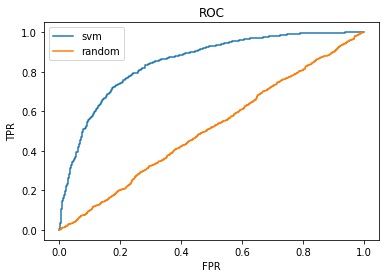

In [11]:
import matplotlib.pyplot as plt

plt.figure()
ax = plt.subplot()
ax.plot(fpr_svm, tpr_svm, label='svm')
ax.set_title('ROC')
ax.set(xlabel='FPR', ylabel='TPR')
ax.plot(fpr_random, tpr_random, label='random')
plt.legend()
plt.show()


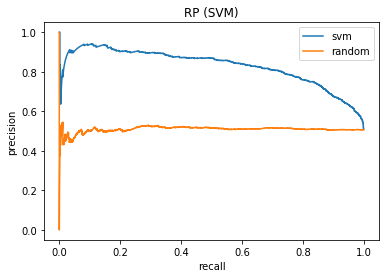

In [12]:
ax = plt.subplot()
ax.plot(recall_svm, precision_svm, label='svm')
ax.set_title('RP (SVM)')
ax.set(xlabel='recall', ylabel='precision')
ax.plot(recall_random, precision_random, label='random')
plt.legend()

plt.show()

Очевидно, что по данным прямым можно сделать вывод, что наш классификатор ведет себя гораздо лучше случайного

А теперь проделайте все то же самое для логистической регрессии (LR) — обучение, подбор параметра регуляризации (используйте L2-регуляризацию), вычисление всех метрик и построение кривых. Сравните результаты LR и SVM с точки зрения всех вычисленных критериев качества, объясните различия (если они есть).

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('scaler', StandardScaler()), ("logreg", LogisticRegression(penalty='l2'))])
param_name = "logreg__C"
search_logreg = GridSearchCV(estimator=logreg, param_grid={param_name: C_list})
model_logreg = search_logreg.fit(X_train, y_train)

In [14]:
print("Лучшее значение параметра " + param_name + "=" + str(model_logreg.best_params_[param_name]))
print("CV score=" + str(model_logreg.best_score_))

Лучшее значение параметра logreg__C=1.0
CV score=0.7801428571428571


In [15]:
prediction_logreg = model_logreg.decision_function(X_test)

print("Для обученного классификатора (ЛогРег):")
fpr_logreg, tpr_logreg, thresholds = roc_curve(y_test, prediction_logreg)
auc_roc = auc(fpr_logreg, tpr_logreg)
print("AUC-ROC = " + str(round(auc_roc,5)))
precision_logreg, recall_logreg, thresholds = precision_recall_curve(y_test, prediction_logreg)
auc_pr = auc(recall_logreg, precision_logreg)
print("AUC-PR = " + str(round(auc_pr, 5)))

Для обученного классификатора (ЛогРег):
AUC-ROC = 0.84787
AUC-PR = 0.82912


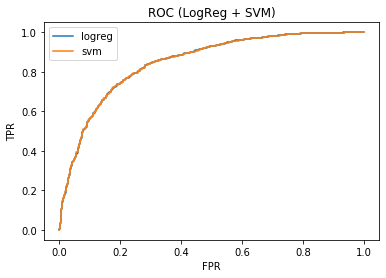

In [16]:
plt.figure()
ax = plt.subplot()
ax.plot(fpr_logreg, tpr_logreg, label='logreg')
ax.plot(fpr_svm, tpr_svm, label='svm')
ax.set_title('ROC (LogReg + SVM)')
ax.set(xlabel='FPR', ylabel='TPR')
plt.legend()
plt.show()

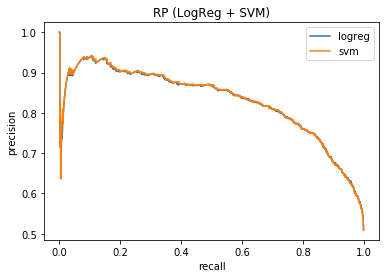

In [17]:
ax = plt.subplot()
ax.plot(recall_logreg, precision_logreg, label="logreg")
ax.set_title('RP (LogReg + SVM)')
ax.set(xlabel='recall', ylabel='precision')
ax.plot(recall_svm, precision_svm, label="svm")
plt.legend()
plt.show()

Методы ведут себя практически идентично. ROC и PR кривые выглядят идентично. Логистическая регрессия показывает слегка более плохую PR кривую, но слегка более хорошую AUC кривую. Различие в метриках слишком незначительны, чтобы делать на их основе какие-то выводы, потому можно считать, что в данной ситуации методы дают одинаковый результат.

В названии метода опорных векторов присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью `make_classification` с 2 признаками, обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут `support_vectors_`). В этот раз, если необходимо, вместо `LinearSVC` воспользуйтесь `SVC(kernel='linear')`, так как только в нём есть информация об опорных векторах.

Ссылка на источник вдохновения: https://www.machinecurve.com/index.php/2020/05/05/how-to-visualize-support-vectors-of-your-svm-classifier/

https://towardsdatascience.com/the-complete-guide-to-support-vector-machine-svm-f1a820d8af0b

In [18]:
#your code here
from sklearn.svm import SVC
X, y = make_classification(n_samples = 1000, n_features=2, n_informative=2, n_redundant=0)
svc = Pipeline([('scaler', StandardScaler()), ("svc", SVC(kernel='linear'))]) 
svc.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(kernel='linear'))])

Данные без разделяющей плоскости:

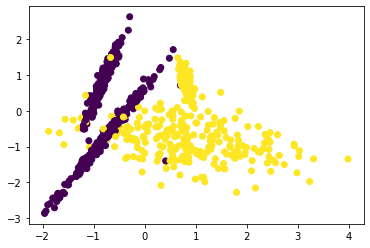

In [19]:
scaler = StandardScaler()
transformedX = scaler.fit_transform(X)
support_vectors = svc[1].support_vectors_
plt.scatter(transformedX[:, 0], transformedX[:, 1], c=y)

Добавляем разделяющую плоскость:

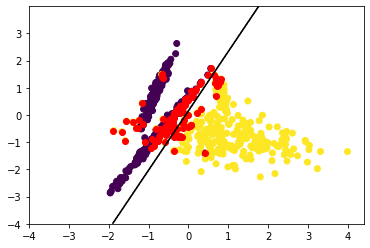

In [20]:

plt.scatter(transformedX[:, 0], transformedX[:, 1], c=y)
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
x_1, x_2 = np.meshgrid(np.arange(-4.0, 4.0, 0.01), np.arange(-4.0, 4.0, 0.01))
Z = svc[1].predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='black')

Красными точками выделены опорные вектора, черная полоса - разделяющая плоскость

В отличие от метода опорных векторов, логистическая регрессия не пытается построить разделяющую гиперплоскость, а приближает в каждой точке пространства объектов правдоподобие положительных ответов $p(y=+1|x)$. Попробуйте нарисовать это распределение на плоскости, не забудьте отметить на ней все объекты. Вам может помочь функция `plt.pcolor`.

Источник вдохновения: https://scikit-learn.org/0.15/auto_examples/plot_classification_probability.html

Text(0.5, 1.0, 'Распределение вероятностей')

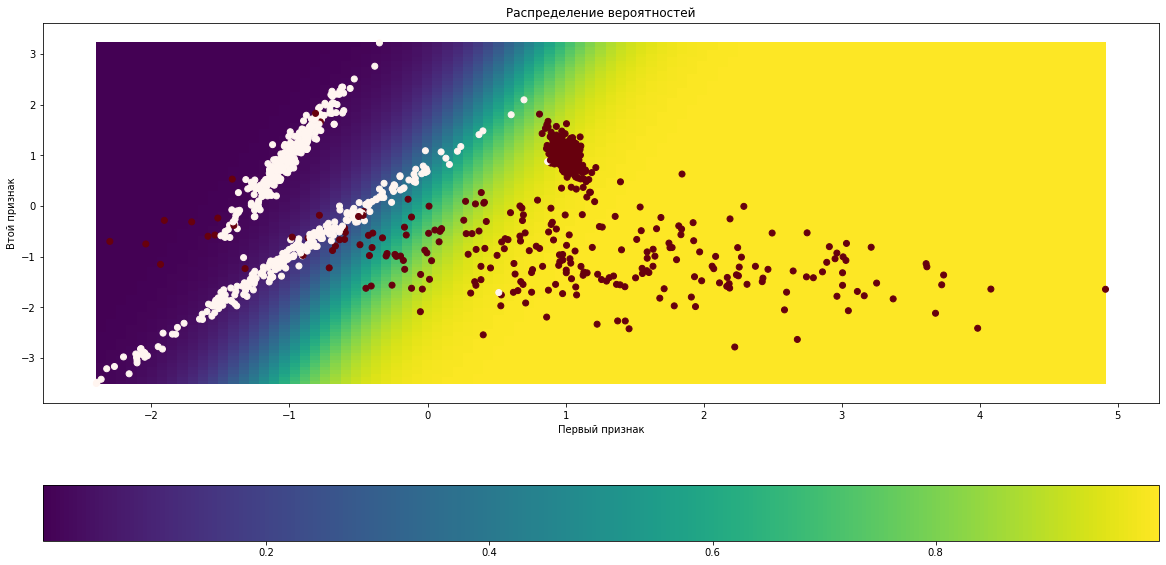

In [85]:
#your code here
logreg = LogisticRegression(penalty='l2')
logreg.fit(X, y)

fig = plt.figure(figsize=(20, 10))

xx = np.linspace(X[:,0].min(), X[:,0].max(), 100)
yy = np.linspace(X[:,1].min(), X[:,1].max(), 100)
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]
probas = logreg.predict_proba(Xfull)
prediction = logreg.predict(Xfull)
positive_idx = (prediction == 1)
map_ = plt.pcolor(xx, yy, probas[:, 1].reshape(100,100))
fig.colorbar(map_, orientation='horizontal')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Reds')
plt.xlabel('Первый признак')
plt.ylabel('Втой признак')
plt.title('Распределение вероятностей')

Красными точками показан положительный класс, белыми - отрицательный, карта - вероятность принадлежности к положительному классу по классификатору

__Задание 2.__ Калибровка вероятностей.

__(1 балл)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [108]:
def plot_calibration_curve(y_test, preds, title):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append(l + (r - l) / 2) # меняем расчет середины интервала
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r) == 1])) # меняем min на mean
    plt.figure(figsize=(6,6))
    plt.plot(bin_middle_points, bin_real_ratios)
    plt.ylim([-0.05, 1.05])
    plt.title(title)
    plt.xlabel("Вероятность")
    plt.ylabel("PR")
    plt.grid()

Сгенерируйте синтетический датасет аналогично использованному в самом первом задании. Постройте калибровочные кривые на тестовой части для логистической регрессии и метода опорных векторов (не забудьте перевести его предсказания в $[0;1]$). Изучите распределение ответов классификаторов (постройте гистограммы с помощью `plt.hist`). Чем они различаются? Чем вы можете объяснить это?

In [109]:
#your code here
X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [118]:
svc = Pipeline([
    ('scaling', StandardScaler()),
    ('svc', SVC(C=0.1, probability=True))])
svc.fit(X_train, y_train)

logreg = Pipeline([
    ('scaling', StandardScaler()),
    ('logreg', LogisticRegression(C=1))])  

logreg.fit(X_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('logreg', LogisticRegression(C=1))])

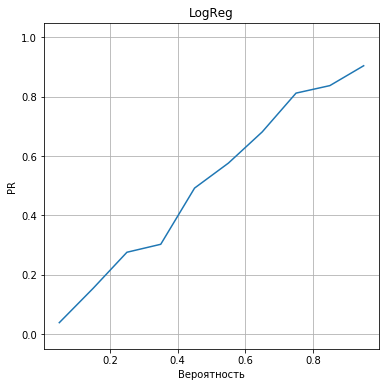

In [124]:
probas_logreg = logreg.predict_proba(X_test)[:, 1]
plot_calibration_curve(y_test, probas_logreg, "LogReg")

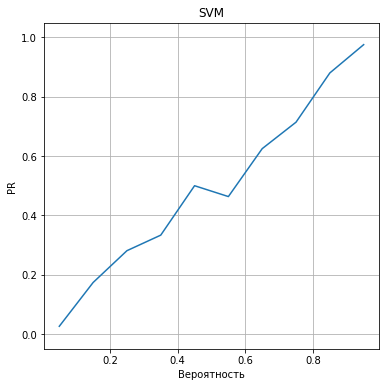

In [123]:
probas_svc = svc.predict_proba(X_test)[:, 1]
plot_calibration_curve(y_test, probas_svc, "SVM")

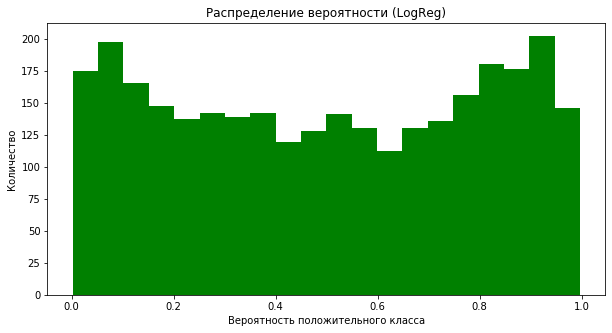

In [137]:
plt.figure(figsize=(10,5))
plt.hist(probas_logreg, bins=20, color='green')
plt.ylabel('Количество')
plt.xlabel('Вероятность положительного класса')
plt.title('Распределение вероятности (LogReg)')
plt.show()

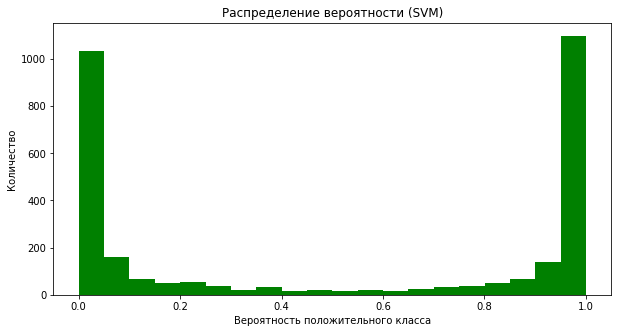

In [136]:
plt.figure(figsize=(10,5))
plt.hist(probas_svc, bins=20, color='green')
plt.ylabel('Количество')
plt.xlabel('Вероятность положительного класса')
plt.title('Распределение вероятности (SVM)')
plt.show()

Разница в гистограммах обусловлена особенностями методов. СВМ пытается разделить выборку так, чтобы разделяющая полоса была максимальной, потому мы наблюдаем, что большинство объектов либо однозначно неположительные, либо однозначно положительные.

Воспользуйтесь `CalibratedClassifierCV` из `sklearn` для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

In [141]:
#your code here
from sklearn.calibration import CalibratedClassifierCV

svc_calibrated = CalibratedClassifierCV(svc, method='sigmoid', cv='prefit')
svc_calibrated.fit(X_train, y_train)
proba_svc_calibrated = svc_calibrated.predict_proba(X_test)[:,1]
proba_svc_calibrated

array([0.99591708, 0.00418535, 0.01078286, ..., 0.00371426, 0.98072385,
       0.95535259])

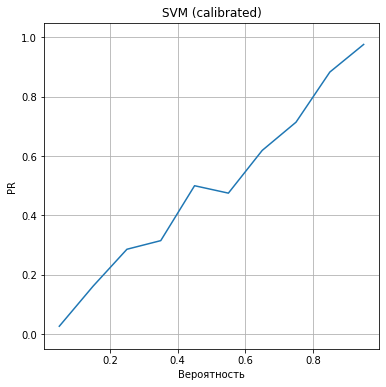

In [142]:
plot_calibration_curve(y_test, proba_svc_calibrated, "SVM (calibrated)")

На разных графиках результат не очевиден. Посмотрим на прямые на одном графике

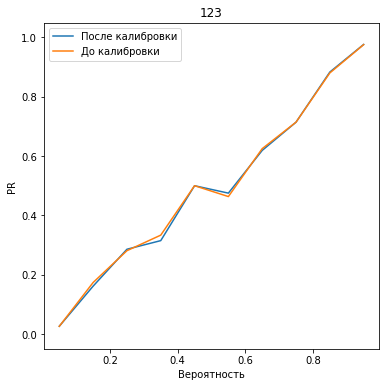

In [154]:
preds = proba_svc_calibrated
bin_middle_points = []
bin_real_ratios = []
# Высчитываем точки для прямой после калибровки
n_bins = 10
for i in range(n_bins):
    l = 1.0 / n_bins * i
    r = 1.0 / n_bins * (i + 1)
    bin_middle_points.append(l + (r - l) / 2)
    bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r) == 1]))
plt.figure(figsize=(6,6))
plt.plot(bin_middle_points, bin_real_ratios, label='После калибровки')

preds = probas_svc
bin_middle_points = []
bin_real_ratios = []
# Высчитываем точки для прямой до калибровки
n_bins = 10
for i in range(n_bins):
    l = 1.0 / n_bins * i
    r = 1.0 / n_bins * (i + 1)
    bin_middle_points.append(l + (r - l) / 2) # меняем расчет середины интервала
    bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r) == 1])) # меняем min на mean
plt.plot(bin_middle_points, bin_real_ratios, label="До калибровки")
plt.ylim([-0.05, 1.05])
plt.title("123")
plt.xlabel("Вероятность")
plt.ylabel("PR")
plt.legend()
plt.show()

Нельзя однозначно судить, какая из прямых ближе к диагональной. В любом случае, изменения довольно незначительны.

__Бонусное задание (0.5 балла).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты. Ключевые слова для вдохновения: `Platt`, `Isotonic`.

Ну это что-то за гранью добра и зла

# Часть 1. Работа с переменными.

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Подготовка данных.__

Загрузим данные [UCI Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing). Этот датасет содержит информацию о банковском телефонном маркетинге, объектом в нем является телефонный звонок потенциальному клиенту с предложением некоторой услуги (утверждается, что это краткосрочный депозит), целевой переменной - ответ клиента (согласился ли он открыть депозит?). В качестве признакового описания используются характеристики клиента (образование, брак и т.д.), данные о звонке и различные экономические индикаторы - более подробная информация представлена в файле `bank-additional-names.txt`.

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip bank-additional.zip


--2020-11-25 23:40:24--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip.2’

bank-additional.zip 100%[===================>] 434,15K   157KB/s    in 2,8s    

2020-11-25 23:40:28 (157 KB/s) - ‘bank-additional.zip.2’ saved [444572/444572]

Archive:  bank-additional.zip
replace bank-additional/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


__Задание 3 (0.5 балла).__ Разделите выборку на обучающую и тестовую в соотношении 3:1. Зафиксируйте `random_state=777`, также используйте `stratify`. Один из столбцов в данных не несет информации для решения задачи — какой? Отбросьте его. 



Интересными для нас являются факторы, которые мы можем получить непосредственно до совершения звонка. Фактор duration не имеет смысла, поскольку он может быть вычислен только к концу звонка, но к концу звонка уже известен наш таргет, потому от этого признака точно надо избавиться.

In [8]:
y = np.where(df['y'] == 'yes', 1, 0)
X = df.drop(columns=['y', 'duration'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=777, stratify=y)

Закодируйте категориальные признаки с помощью `OrdinalEncoder`. Посчитайте качество (в этом задании будем работать c `AUC-PR`) при применении логистической регрессии. Замерьте время, потребовавшееся на обучение модели (с учетом кодирования признаков).

__Вопрос__: почему в данном задании мы выбрали метрикой именно `AUC-PR`, а не, к примеру, `AUC-ROC`?

__Ваш ответ__: для компании гораздо более интересно, чтобы классификатор корректно вел себя с положительный классом, поскольку компания получает деньги за выданные депозиты. В таком случае для оценки моделей лучше использовать PR кривую вместо ROC. 

In [10]:
# Исходя из источника https://archive.ics.|uci.edu/ml/datasets/bank+marketing
numeric_features = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [213]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


column_transformer = ColumnTransformer([
    ('encoding', OrdinalEncoder(), categorical_features),
])

logreg = Pipeline([
    ('transform', column_transformer),
    ('scaling', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l2'))
])

In [218]:
C_values = np.logspace(-2, 2, 5)
param_name = 'logreg__C'
search = GridSearchCV(estimator=logreg, param_grid={param_name: C_values}, cv=3)
search.fit(X_train, y_train)

print('Лучшее значение регуляризатора: ' + str(search.best_params_[param_name]))

Лучшее значение регуляризатора: 1.0


In [221]:
best_model = search.best_estimator_
prediction_train = best_model.decision_function(X_train)
print("AUC-PR (train) = " + str(round(average_precision_score(y_train, prediction_train), 5)))
prediction_test = best_model.decision_function(X_test)
print("AUC-PR (test) = " + str(round(average_precision_score(y_test, prediction_test), 5)))

AUC-PR (train) = 0.29162
AUC-PR (test) = 0.30722


In [220]:
%%timeit
logreg.fit(X_train, y_train)

90.4 ms ± 6.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


__Задание 4 (0.5 балла).__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на кодирование категориальных признаков и обучение модели.



In [223]:
column_transformer = ColumnTransformer([
    ('encoding', OneHotEncoder(sparse=False), categorical_features),
])

logreg = Pipeline([
    ('transform', column_transformer),
    ('scaling', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l2'))
])

search = GridSearchCV(estimator=logreg, param_grid={param_name: C_values}, cv=3)
search.fit(X_train, y_train)

print('Лучшее значение регуляризатора: ' + str(search.best_params_[param_name]))

Лучшее значение регуляризатора: 0.01


In [224]:
best_model = search.best_estimator_
prediction_train = best_model.decision_function(X_train)
print("AUC-PR (train) = " + str(round(average_precision_score(y_train, prediction_train), 5)))
prediction_test = best_model.decision_function(X_test)
print("AUC-PR (test) = " + str(round(average_precision_score(y_test, prediction_test), 5)))

AUC-PR (train) = 0.39506
AUC-PR (test) = 0.40783


In [225]:
%%timeit
logreg.fit(X_train, y_train)

182 ms ± 8.89 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**Вывод**: Качество модели по метрике AUC-PR улучшилось довольно внушительно (практически в полтора раза), но и временные затраты на OHE почти в два раза выше.

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирования категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 5 (1 балл).__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущими экспериментами (с учетом кодирования признаков). Заметили ли вы что-то интересное?


__Бонус (1 балл)__: Здесь и далее реализуйте вычисление счетчиков с помощью трансформера (наследуйтесь от классов `BaseEstimator, TransformerMixin` из `sklearn.base`). Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики нужно считать только по обучающей выборке в методе `fit`. Ваш трансформер должен принимать при инициализации список из категориальных признаков и изменять только их. 


In [229]:
#your code here
from sklearn.base import BaseEstimator, TransformerMixin


class CountEncoder (BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.global_mean = 0 # значение среднего таргета для того, чтобы заполнять впервые встреченные значения. Аналогично по умолчанию работает тут https://contrib.scikit-learn.org/category_encoders/targetencoder.html
        self.values_to_fit = {}
        # это словарь значений, которые мы будем вставлять
        # первый ключ - название столбца
        # второй ключ - одно из возможных категориальных значений в этом столбце
        # значение - среднее таргета для второго ключа 

        
    def fit(self, X, y):
        for column in self.columns:
            self.values_to_fit[column] = {}
            for value in X[column].unique():
                self.values_to_fit[column][value] = np.mean(y[X[column] == value]) # вычисляем среднее для текущего значения
        self.global_mean = np.mean(y)
        return self
    
    def transform(self, X):
        X_copied = X.copy()
        for column in self.columns:
            new_column_name = column + '_encoded'
            X_copied.loc[:, new_column_name] = 0
            
            for value in X_copied[column].unique():
                if value in self.values_to_fit[column].keys(): # это значение встретилось в трейне
                    X_copied.loc[X_copied[column] == value, new_column_name] = self.values_to_fit[column][value]
                else:
                    X_copied.loc[X_copied[column] == value, new_column_name] = self.global_mean
        
        X_return = X_copied.drop(self.columns, axis=1) # убираем исходные столбцы
        return X_return

In [241]:
logreg = Pipeline([
    ('transform', CountEncoder(categorical_features)),
    ('scaling', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l2'))
])
param_name = 'logreg__C'
search = GridSearchCV(estimator=logreg, param_grid={param_name: C_values}, cv=3)
search.fit(X_train, y_train)

print('Лучшее значение регуляризатора: ' + str(search.best_params_[param_name]))

Лучшее значение регуляризатора: 1.0


In [242]:
best_model = search.best_estimator_
prediction_train = best_model.decision_function(X_train)
print("AUC-PR (train) = " + str(round(average_precision_score(y_train, prediction_train), 5)))
prediction_test = best_model.decision_function(X_test)
print("AUC-PR (test) = " + str(round(average_precision_score(y_test, prediction_test), 5)))

AUC-PR (train) = 0.44381
AUC-PR (test) = 0.44283


In [243]:
%%timeit
logreg.fit(X_train, y_train)

424 ms ± 23.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Вновь получили довольно ощутимый прирост в качестве (0.44 вместо 0.4), но и время обучения опять подскочило в два раза. Кроме того, получили просадку качества на тесте, очевидно, потому что счетчики ведут к переобучению нашей модели

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

__Задание 6.__ Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (постарайтесь найти баланс между борьбой с переобучением и сохранением полезности признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы.

__(0.5 балла)__

In [247]:
#your code here
from sklearn.base import BaseEstimator, TransformerMixin


class CountEncoder (BaseEstimator, TransformerMixin):
    def __init__(self, columns, noise_dev=0):
        self.columns = columns
        self.global_mean = 0 # значение среднего таргета для того, чтобы заполнять впервые встреченные значения. Аналогично по умолчанию работает тут https://contrib.scikit-learn.org/category_encoders/targetencoder.html
        self.noise_dev = noise_dev # отклонение для добавления шума из нормального распределения
        self.values_to_fit = {}
        # это словарь значений, которые мы будем вставлять
        # первый ключ - название столбца
        # второй ключ - одно из возможных категориальных значений в этом столбце
        # значение - среднее таргета для второго ключа 

        
    def fit(self, X, y):
        for column in self.columns:
            self.values_to_fit[column] = {}
            for value in X[column].unique():
                self.values_to_fit[column][value] = np.mean(y[X[column] == value]) # вычисляем среднее для текущего значения
        self.global_mean = np.mean(y)
        return self
    
    def transform(self, X):
        X_copied = X.copy()
        for column in self.columns:
            new_column_name = column + '_encoded'
            X_copied.loc[:, new_column_name] = 0
            
            for value in X_copied[column].unique():
                if value in self.values_to_fit[column].keys(): # это значение встретилось в трейне
                    X_copied.loc[X_copied[column] == value, new_column_name] = self.values_to_fit[column][value]
                else:
                    X_copied.loc[X_copied[column] == value, new_column_name] = self.global_mean
                X_copied.loc[:, new_column_name] += np.random.normal(0, self.noise_dev, X.shape[0])                    
        X_return = X_copied.drop(self.columns, axis=1) # убираем исходные столбцы
        return X_return

In [248]:
logreg = Pipeline([
    ('transform', CountEncoder(categorical_features)),
    ('scaling', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l2'))
])
C_values = np.logspace(-2, 2, 5)
noise_values = np.logspace(-2, 2, 5)
C_param_name = 'logreg__C'
noise_param_name = 'transform__noise_dev'
search = GridSearchCV(estimator=logreg, param_grid={C_param_name: C_values, noise_param_name: noise_values}, cv=3)
search.fit(X_train, y_train)
print('Лучшее значение регуляризатора: ' + str(search.best_params_[C_param_name]))
print('Лучшее значение шума: ' + str(search.best_params_[noise_param_name]))

Лучшее значение регуляризатора: 100.0
Лучшее значение шума: 10.0


In [249]:
best_model = search.best_estimator_
prediction_train = best_model.decision_function(X_train)
print("AUC-PR (train) = " + str(round(average_precision_score(y_train, prediction_train), 5)))
prediction_test = best_model.decision_function(X_test)
print("AUC-PR (test) = " + str(round(average_precision_score(y_test, prediction_test), 5)))

AUC-PR (train) = 0.41888
AUC-PR (test) = 0.42323


Качество на трейне, очевидно, упало, зато теперь оно не падает относительно трейна на тесте. Делаем вывод, что модель теперь меньше переобучается, что и было нашей целью

__(Бонусная часть, 0.5 балла)__ Посчитайте корректные счётчики первым или вторым способов из описанных выше (не забудьте добавить и шум). 



In [11]:
#Попробуем вычислять значения при помощи кросс-валидации
from sklearn.model_selection import KFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression



class CountEncoder (BaseEstimator, TransformerMixin):
    def __init__(self, columns, noise_dev=0, cv=3):
        self.columns = columns
        self.global_mean = 0 # значение среднего таргета для того, чтобы заполнять впервые встреченные значения. Аналогично по умолчанию работает тут https://contrib.scikit-learn.org/category_encoders/targetencoder.html
        self.noise_dev = noise_dev # отклонение для добавления шума из нормального распределения
        self.cv = cv # количество фолдов

        
    def fit(self, X, y): # в данном случае не получится разделить процесс генерации значений и их замены, поэтому fit будет иметь довольно формальный характер 
        self.y = y
        self.global_mean = np.mean(y)
        return self
    
    def transform(self, X):
        X_copied = X.copy()
        index_generator = KFold(self.cv)
        initial_features_count = X.shape[1] # для того, чтобы добавлять столбцы при помощи iloc
        for i in range(len(self.columns)):
            new_column_name = self.columns[i] + '_encoded'
            X_copied.loc[:, new_column_name] = 0
            for train_idx, test_idx in index_generator.split(X_copied):                
                X_train = X_copied.iloc[train_idx, i]
                y_train = self.y[train_idx]
                X_test = X_copied.iloc[test_idx, i]
                y_test = self.y[test_idx]
                
                encoded_values = {} # Словарь значений для подстановки. Далее будет заполнен на основе трейна
                # Получим средние значения на трейне:
                for value in X_train.unique():
                    encoded_values[value] = np.mean(y_train[X_train == value])
                    
                for value in X_test.unique():
                    if value in encoded_values.keys(): # это значение встретилось в трейне (всех фолдах кроме текущего)
                        X_copied.loc[X_copied[self.columns[i]] == value, new_column_name] = encoded_values[value]
                    else:
                        X_copied.loc[X_copied[self.columns[i]] == value, new_column_name] = self.global_mean
                    X_copied.loc[:, new_column_name] += np.random.normal(0, self.noise_dev, X.shape[0])
                    
        X_return = X_copied.drop(self.columns, axis=1) # убираем исходные столбцы
        print("Transformed")
        return X_return

In [12]:
logreg = Pipeline([
    ('transform', CountEncoder(categorical_features)),
    ('scaling', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l2'))
])
logreg.fit(X_train, y_train)

Transformed


Pipeline(steps=[('transform',
                 CountEncoder(columns=['job', 'marital', 'education', 'default',
                                       'housing', 'loan', 'contact', 'month',
                                       'day_of_week', 'poutcome'])),
                ('scaling', StandardScaler()),
                ('logreg', LogisticRegression())])

In [15]:
prediction_train = logreg.decision_function(X_train)
print("AUC-PR (train) = " + str(round(average_precision_score(y_train, prediction_train), 5)))
prediction_test = logreg.decision_function(X_test)
print("AUC-PR (test) = " + str(round(average_precision_score(y_test, prediction_test), 5)))

Transformed
AUC-PR (train) = 0.42128
Transformed
AUC-PR (test) = 0.42631


Значения AUC-PR метрик для трейна и теста увеличились, но незначительно, и это явно не стоит потрачнного на расчеты время (время обучения увеличилось кратно)

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — доля объектов положительного класса в выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значением. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!


__Задание 7 (1 балл).__ Добавьте сглаживание, описанное выше и повторите эксперименты.

In [18]:
#your code here
#your code here
from sklearn.base import BaseEstimator, TransformerMixin


class CountEncoder (BaseEstimator, TransformerMixin):
    def __init__(self, columns, noise_dev=0, C=1):
        self.columns = columns
        self.global_mean = 0 # значение среднего таргета для того, чтобы заполнять впервые встреченные значения. Аналогично по умолчанию работает тут https://contrib.scikit-learn.org/category_encoders/targetencoder.html
        self.noise_dev = noise_dev # отклонение для добавления шума из нормального распределения
        self.C = C # коэффицент сглаживания
        self.values_to_fit = {}
        # это словарь значений, которые мы будем вставлять
        # первый ключ - название столбца
        # второй ключ - одно из возможных категориальных значений в этом столбце
        # значение - среднее таргета для второго ключа 

        
    def fit(self, X, y):
        self.global_mean = np.mean(y)
        for column in self.columns:
            self.values_to_fit[column] = {}
            for value in X[column].unique():
                self.values_to_fit[column][value] =  (np.sum(y[X[column] == value]) + self.C * self.global_mean) / (y[X[column] == value].shape[0] + self.C)
        return self
    
    def transform(self, X):
        X_copied = X.copy()
        for column in self.columns:
            new_column_name = column + '_encoded'
            X_copied.loc[:, new_column_name] = 0
            
            for value in X_copied[column].unique():
                if value in self.values_to_fit[column].keys(): # это значение встретилось в трейне
                    X_copied.loc[X_copied[column] == value, new_column_name] = self.values_to_fit[column][value]
                else:
                    X_copied.loc[X_copied[column] == value, new_column_name] = self.global_mean
                X_copied.loc[:, new_column_name] += np.random.normal(0, self.noise_dev, X.shape[0])                    
        X_return = X_copied.drop(self.columns, axis=1) # убираем исходные столбцы
        return X_return

In [20]:
logreg = Pipeline([
    ('transform', CountEncoder(categorical_features)),
    ('scaling', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l2'))
])
C_values = np.logspace(-2, 2, 3)
noise_values = np.logspace(-2, 2, 3)
C_smoothing_values = np.logspace(-2, 2, 3)
C_param_name = 'logreg__C'
noise_param_name = 'transform__noise_dev'
C_smoothing_param_name = 'transform__C'
search = GridSearchCV(estimator=logreg, param_grid={C_param_name: C_values, noise_param_name: noise_values, C_smoothing_param_name: C_smoothing_values}, cv=3)
search.fit(X_train, y_train)
print('Лучшее значение регуляризатора: ' + str(search.best_params_[C_param_name]))
print('Лучшее значение шума: ' + str(search.best_params_[noise_param_name]))
print('Лучшее значение коэффициента сглаживания: ' + str(search.best_params_[C_smoothing_param_name]))

Лучшее значение регуляризатора: 100.0
Лучшее значение шума: 1.0
Лучшее значение коэффициента сглаживания: 1.0


In [21]:
best_model = search.best_estimator_
prediction_train = best_model.decision_function(X_train)
print("AUC-PR (train) = " + str(round(average_precision_score(y_train, prediction_train), 5)))
prediction_test = best_model.decision_function(X_test)
print("AUC-PR (test) = " + str(round(average_precision_score(y_test, prediction_test), 5)))

AUC-PR (train) = 0.41847
AUC-PR (test) = 0.42506


Значение метрики AUC-PR незначительно улучшилось, но, возможно, потенциала у метода гораздо больше, но параметры необходимо подбирать более внимательно (GridSearchCV для трех параметров работает уже слишком долго)

__Задание 8 (0.5 балла).__ В данных имеется признак "возраст клиента". Сейчас мы интерпретируем его как числовой, что в общем случае для линейной модели может быть неверной гипотезой. Тем не менее, у этого признака есть довольно много уникальных значений (сколько?), поэтому применять к нему one-hot кодирование может оказаться излишним. Попробуйте закодировать возраст с помощью счетчиков. Стало ли лучше?



In [29]:
print("Уникальных значений возраста: " + str(X['age'].unique().shape[0]))

Уникальных значений возраста: 78


In [23]:
#your code here
numeric_features = ['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [24]:
logreg = Pipeline([
    ('transform', CountEncoder(categorical_features)),
    ('scaling', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l2'))
])
C_values = np.logspace(-2, 2, 3)
noise_values = np.logspace(-2, 2, 3)
C_smoothing_values = np.logspace(-2, 2, 3)
C_param_name = 'logreg__C'
noise_param_name = 'transform__noise_dev'
C_smoothing_param_name = 'transform__C'
search = GridSearchCV(estimator=logreg, param_grid={C_param_name: C_values, noise_param_name: noise_values, C_smoothing_param_name: C_smoothing_values}, cv=3)
search.fit(X_train, y_train)
print('Лучшее значение регуляризатора: ' + str(search.best_params_[C_param_name]))
print('Лучшее значение шума: ' + str(search.best_params_[noise_param_name]))
print('Лучшее значение коэффициента сглаживания: ' + str(search.best_params_[C_smoothing_param_name]))

Лучшее значение регуляризатора: 0.01
Лучшее значение шума: 100.0
Лучшее значение коэффициента сглаживания: 100.0


In [25]:
best_model = search.best_estimator_
prediction_train = best_model.decision_function(X_train)
print("AUC-PR (train) = " + str(round(average_precision_score(y_train, prediction_train), 5)))
prediction_test = best_model.decision_function(X_test)
print("AUC-PR (test) = " + str(round(average_precision_score(y_test, prediction_test), 5)))

AUC-PR (train) = 0.41355
AUC-PR (test) = 0.42754


На трейне метрика стала хуже, на тесте - ощутимо лучше. Однозначных выводов в текущей ситуации сделать нельзя, в целом, обе модели примерно идентичны.

Можно пойти и в обратную сторону. У нас есть признаки "месяц и день недели" для звонка. Попробуйте интерпретировать их как числовые (месяц от 0 до 12, дни недели от 0 до 4). Стало ли лучше в этот раз?

In [10]:
dow_map = {
    'mon' : 0,
    'tue': 1,
    'wed': 2,
    'thu': 3,
    'fri': 4
}
month_map = {
    'mar': 0,
    'apr': 1,
    'may': 2,
    'jun': 3,
    'jul': 4,
    'aug': 5,
    'sep': 6,
    'oct': 7,
    'nov': 8,
    'dec': 9
}

X = X.replace(month_map)
X = X.replace(dow_map)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=777, stratify=y)

In [43]:
#your code here
numeric_features = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'day_of_week', 'month']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

In [44]:
logreg = Pipeline([
    ('transform', CountEncoder(categorical_features)),
    ('scaling', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l2'))
])
C_values = np.logspace(-2, 2, 3)
noise_values = np.logspace(-2, 2, 3)
C_smoothing_values = np.logspace(-2, 2, 3)
C_param_name = 'logreg__C'
noise_param_name = 'transform__noise_dev'
C_smoothing_param_name = 'transform__C'
search = GridSearchCV(estimator=logreg, param_grid={C_param_name: C_values, noise_param_name: noise_values, C_smoothing_param_name: C_smoothing_values}, cv=3)
search.fit(X_train, y_train)
print('Лучшее значение регуляризатора: ' + str(search.best_params_[C_param_name]))
print('Лучшее значение шума: ' + str(search.best_params_[noise_param_name]))
print('Лучшее значение коэффициента сглаживания: ' + str(search.best_params_[C_smoothing_param_name]))

Лучшее значение регуляризатора: 1.0
Лучшее значение шума: 0.01
Лучшее значение коэффициента сглаживания: 100.0


In [46]:
best_model = search.best_estimator_
prediction_train = best_model.decision_function(X_train)
print("AUC-PR (train) = " + str(round(average_precision_score(y_train, prediction_train), 5)))
prediction_test = best_model.decision_function(X_test)
print("AUC-PR (test) = " + str(round(average_precision_score(y_test, prediction_test), 5)))

AUC-PR (train) = 0.43727
AUC-PR (test) = 0.43412


Использование дня недели и месяца в качестве числового признака внезапно дало довольно ощутимый прирост как на трейне, так и на тесте. При этом видно, что качество падает на тесте относительно трейна, делаем вывод, что, скорее всего, произошел оверфит

__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием вы заметили.

__Ответ:__ Как мы уже увидели, счётчики очень легко оверфитятся, поэтому использовать их нужно очень внимательно, это их очевидный минус. Ну а плюс так же очевиден - ohe увеличивает количество признаков очень существенно, в то время как счетчики сохраняют размерность выборки, что прямо влияет на скорость обучения

# Часть 2. Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про банковский телефонный маркетинг.

In [11]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

X = df.drop(columns=['duration', 'y'])
y = (df.y == 'yes')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

Как вы помните, в данных много категориальных признаков (сейчас давайте интерпретировать возраст как числовой). Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [12]:
#your code here
numeric_features = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'day_of_week', 'month']

In [13]:
X = X.replace(month_map)
X = X.replace(dow_map)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=777, stratify=y)

In [197]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])
features_before = X.shape[1]
X_encoded = column_transformer.fit_transform(X, y)
features_after = X_encoded.shape[1]
print('До кодирования: ' + str(features_before))
print('После OHE: ' + str(features_after))

До кодирования: 19
После OHE: 62


В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — `AUC-PR`. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [70]:
#your code here
logreg = Pipeline([
    ('ohe_and_scaling', column_transformer),
    ('logreg', LogisticRegression(penalty='l2', max_iter=500))
])
C_param_name = 'logreg__C'
C_values = np.logspace(-2, 2, 5)
search = GridSearchCV(logreg, {C_param_name: C_values}, cv=5)
model = search.fit(X_train, y_train)

In [71]:
print('Лучшее значение регуляризатора: ' + str(search.best_params_[C_param_name]))
best_model = search.best_estimator_
prediction_train = best_model.decision_function(X_train)
print("AUC-PR (train) = " + str(round(average_precision_score(y_train, prediction_train), 5)))
prediction_test = best_model.decision_function(X_test)
print("AUC-PR (test) = " + str(round(average_precision_score(y_test, prediction_test), 5)))

Лучшее значение регуляризатора: 0.1
AUC-PR (train) = 0.45733
AUC-PR (test) = 0.44995


### Встроенные методы

Допустим, мы хотим оставить только 40 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8 (0.5 балла).__ Оставьте 40 признаков с наибольшим модулем соответствующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков.

Изменилось ли качество? Как?



In [250]:
def get_optimal_weights_full(X, y):
    column_transformer = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_features), 
        ('scaling', StandardScaler(), numeric_features)
    ])
    logreg = Pipeline([
    ('ohe_and_scaling', column_transformer),
    ('logreg', LogisticRegression(penalty='l2', max_iter=500))
    ])
    model = logreg.fit(X_train, y_train)
    weights = model[1].coef_[0]
    return weights

In [235]:
def get_best_features(X, weights):
    n = 40
    threshold = sorted(np.abs(weights), reverse=True)[n] # находим порог самого "слабого" признака, начиная с которого будем убирать признаки
    idx = np.where(abs(weights) > threshold)[0] # индексы наиболее значимых весов
    return X[:, idx]

In [251]:
best_weights_scale = get_optimal_weights_full(X_train, y_train)

In [252]:
X_train_encoded = column_transformer.transform(X_train)
X_test_encoded = column_transformer.transform(X_test)
best_features_train = get_best_features(X_train_encoded, best_weights_scale)
best_features_test = get_best_features(X_test_encoded, best_weights_scale)

In [253]:
logreg = Pipeline([
    ('logreg', LogisticRegression(penalty='l2', max_iter=500))
])
C_param_name = 'logreg__C'
C_values = np.logspace(-2, 2, 5)
search = GridSearchCV(logreg, {C_param_name: C_values}, cv=5)
model = search.fit(best_features_train, y_train)

In [254]:
print('Лучшее значение регуляризатора: ' + str(search.best_params_[C_param_name]))
best_model = search.best_estimator_
prediction_train = best_model.decision_function(best_features_train)
print("AUC-PR (train) = " + str(round(average_precision_score(y_train, prediction_train), 5)))
prediction_test = best_model.decision_function(best_features_test)
print("AUC-PR (test) = " + str(round(average_precision_score(y_test, prediction_test), 5)))

Лучшее значение регуляризатора: 0.01
AUC-PR (train) = 0.4427
AUC-PR (test) = 0.44166


Модель стала слега хуже, зато теперь метрика не падает на тесте. Оценим время:

In [255]:
%%timeit
X_test_encoded = column_transformer.transform(X_test) # кодируем признаки (ohe + scaling)
best_weights = get_optimal_weights_full(X_train, y_train) # выбираем лучшие веса
best_features_test = get_best_features(X_test_encoded, best_weights) # отбираем признаки
best_model.fit(best_features_test, y_test)

1.33 s ± 94.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отмасштабируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

Проведем отбор по немасштабированным признакам:

In [256]:
#your code here
def get_optimal_weights_full(X, y):
    column_transformer = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_features), 
    ])
    logreg = Pipeline([
    ('ohe', column_transformer),
    ('logreg', LogisticRegression(penalty='l2', max_iter=500))
    ])
    model = logreg.fit(X_train, y_train)
    weights = model[1].coef_[0]
    return weights

In [257]:
best_weights_no_scale = get_optimal_weights_full(X_train, y_train)
X_train_encoded = column_transformer.transform(X_train)
X_test_encoded = column_transformer.transform(X_test)
best_features_train = get_best_features(X_train_encoded, best_weights_no_scale)
best_features_test = get_best_features(X_test_encoded, best_weights_no_scale)

In [258]:
logreg = Pipeline([
    ('logreg', LogisticRegression(penalty='l2', max_iter=500))
])
C_param_name = 'logreg__C'
C_values = np.logspace(-2, 2, 5)
search = GridSearchCV(logreg, {C_param_name: C_values}, cv=5)
model = search.fit(best_features_train, y_train)

In [259]:
print('Лучшее значение регуляризатора: ' + str(search.best_params_[C_param_name]))
best_model = search.best_estimator_
prediction_train = best_model.decision_function(best_features_train)
print("AUC-PR (train) = " + str(round(average_precision_score(y_train, prediction_train), 5)))
prediction_test = best_model.decision_function(best_features_test)
print("AUC-PR (test) = " + str(round(average_precision_score(y_test, prediction_test), 5)))

Лучшее значение регуляризатора: 0.1
AUC-PR (train) = 0.33758
AUC-PR (test) = 0.35034


Без скалирования все стало очень печально мо метрикам :(

In [260]:
%%timeit
X_test_encoded = column_transformer.transform(X_test) # кодируем признаки (ohe + scaling)
best_weights = get_optimal_weights_full(X_train, y_train) # выбираем лучшие веса
best_features_test = get_best_features(X_test_encoded, best_weights) # отбираем признаки
best_model.fit(best_features_test, y_test)

703 ms ± 60.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Зато в два раза быстрее обучается :)

Вопрос на засыпку: one-hot кодирование возвращает нам единичные признаки-индикаторы. Попробуйте также отскалировать их, как и обычные числовые, и снова выбрать 40 главных по вкладу признаков. Изменился ли их список? Изменится ли качество?

In [268]:
#your code here
def get_optimal_weights_full(X, y):
    column_transformer = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_features), 
    ])
    logreg = Pipeline([
    ('ohe', column_transformer),
    ('scaling', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l2', max_iter=500))
    ])
    model = logreg.fit(X_train, y_train)
    weights = model[2].coef_[0]
    return weights

In [269]:
best_weights_scale_ohe = get_optimal_weights_full(X_train, y_train)
X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)
best_features_train = get_best_features(X_train_encoded, best_weights_no_scale)
best_features_test = get_best_features(X_test_encoded, best_weights_no_scale)

In [270]:
logreg = Pipeline([
    ('logreg', LogisticRegression(penalty='l2', max_iter=500))
])
C_param_name = 'logreg__C'
C_values = np.logspace(-2, 2, 5)
search = GridSearchCV(logreg, {C_param_name: C_values}, cv=5)
model = search.fit(best_features_train, y_train)

In [271]:
print('Лучшее значение регуляризатора: ' + str(search.best_params_[C_param_name]))
best_model = search.best_estimator_
prediction_train = best_model.decision_function(best_features_train)
print("AUC-PR (train) = " + str(round(average_precision_score(y_train, prediction_train), 5)))
prediction_test = best_model.decision_function(best_features_test)
print("AUC-PR (test) = " + str(round(average_precision_score(y_test, prediction_test), 5)))

Лучшее значение регуляризатора: 1.0
AUC-PR (train) = 0.39554
AUC-PR (test) = 0.40916


Значения немного получше, чем без скалирования вообще, но не дотягивают до варианта без скалированием закодированных признаков

Оценим список весов для всех вариантов:

In [284]:
def get_features_positions(weights):
    n = 40
    threshold = sorted(np.abs(weights), reverse=True)[n] # находим порог самого "слабого" признака, начиная с которого будем убирать признаки
    idx = np.where(abs(weights) > threshold)[0]
    return idx

print(get_features_positions(best_weights_scale_ohe))
print(get_features_positions(best_weights_no_scale))
print(get_features_positions(best_weights_scale))

[ 0  1  2  4  5  7  8  9 12 13 14 16 18 19 22 23 24 25 26 30 32 33 34 35
 36 37 39 40 41 42 43 44 45 46 47 48 49 50 51 52]
[ 1  2  3  4  5  6  7  8  9 12 13 14 15 16 18 19 20 21 22 23 24 25 26 33
 34 35 36 37 39 40 41 42 44 45 46 48 49 50 51 52]
[ 1  3  4  5  7  8 10 11 12 13 15 16 20 21 24 25 33 34 35 36 37 39 40 42
 43 44 45 47 48 49 50 51 52 54 55 57 58 59 60 61]


Списки для скалирования после кодирования ohe и без скалирования в принципе довольно похожи, в случае же скалирования только численных фичей результат доовльно сильно отличается, он и дает лучшие метрики.

### Методы фильтрации


Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(j) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu$, $\sigma$, $n$ соответственно среднее, стандартное отклонение и количество объектов каждого из классов.

__Задание 9 (0.5 балла).__ Оставьте 40 признаков с наибольшим значением $t$ и замерьте качество. Не забудьте замерить скорость отбора признаков в этом случае.



In [313]:
def get_best_features_filter(X, y):
    n = 40
    t_values = []
    for column in range(X.shape[1]):
        positive_loc = y == 1
        negative_loc = y == 0
        count_positives = X[positive_loc, column].shape[0]
        sigma_positives = np.std(X[positive_loc, column])
        average_positives = np.mean(X[positive_loc, column])
        count_negatives = X[negative_loc, column].shape[0]
        sigma_negatives = np.std(X[negative_loc, column])
        average_negatives = np.mean(X[negative_loc, column])
        t_value = abs(average_positives - average_negatives) / np.sqrt((count_positives * sigma_positives + count_negatives*sigma_negatives) / (count_positives + count_negatives))
        t_values.append(t_value)
    idx = (-np.array(t_values)).argsort()[:n] # индексы топ40 фич по t-value
    return X[:, idx]
        

In [ ]:
#your code here
X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)
best_features_train = get_best_features_filter(X_train_encoded, y_train)
best_features_test = get_best_features_filter(X_test_encoded, y_test)

In [318]:
logreg = Pipeline([
    ('logreg', LogisticRegression(penalty='l2', max_iter=500))
])
C_param_name = 'logreg__C'
C_values = np.logspace(-2, 2, 5)
search = GridSearchCV(logreg, {C_param_name: C_values}, cv=5)
model = search.fit(best_features_train, y_train)

In [319]:
print('Лучшее значение регуляризатора: ' + str(search.best_params_[C_param_name]))
best_model = search.best_estimator_
prediction_train = best_model.decision_function(best_features_train)
print("AUC-PR (train) = " + str(round(average_precision_score(y_train, prediction_train), 5)))
prediction_test = best_model.decision_function(best_features_test)
print("AUC-PR (test) = " + str(round(average_precision_score(y_test, prediction_test), 5)))

Лучшее значение регуляризатора: 0.01
AUC-PR (train) = 0.45033
AUC-PR (test) = 0.42175


На трейне качество получилось лучшим из всех вариантов, но вновь произошел оверфит

In [ ]:
%%timeit
X_test_encoded = column_transformer.transform(X_test) # кодируем признаки (ohe + scaling)
best_features_test = get_best_features_filter(X_test_encoded, y_test) # отбираем признаки
best_model.fit(best_features_test, y_test)

Зато довольно быстро, ведь нампай паралелит!

### Методы-обёртки

__Задание 10 (1 балл).__ 

Третий из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не окажется выполненым некоторое условие (количество признаков или ухудшение качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите обучающую выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только для финальной оценки качества.

Снова оставьте только 40 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [410]:
def get_best_features_brute(classificator, X, y):
    excluded_idx = []
    history = []
    n = 40
    features = [i for i in range(X.shape[1])]
    for i in range(len(features) - n):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4, stratify=y)
        max_auc = 0
        max_auc_idx = -1
        features_left = [feature for feature in features if feature not in excluded_idx]
        for column in range(X_train.shape[1]):
            if (column not in features_left):
                continue
            features_left.remove(column)
            X_train_curr = X_train[:, features_left]
            X_test_curr = X_test[:, features_left]
            classificator.fit(X_train_curr, y_train)
            prediction = classificator.decision_function(X_test_curr)
            auc = average_precision_score(y_test, prediction)
            if auc > max_auc:
                max_auc = auc
                max_auc_idx = column
            features_left.append(column)
        print("["+str(i+1)+"]" + "Удаляем признак с индексом=" + str(max_auc_idx) + ", после удаления которого AUC-PR=" + str(max_auc))
        history.append(max_auc)
        excluded_idx.append(max_auc_idx)
    features_left = [feature for feature in features if feature not in excluded_idx]
    return features_left

In [411]:
#your code here
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])
X_train_encoded = column_transformer.fit_transform(X_train)
logreg = Pipeline([
    ('logreg', LogisticRegression(penalty='l2', max_iter=500))
])
features_idx, history = get_best_features_brute(logreg, X_train_encoded, y_train)

[1]Удаляем признак с индексом=5, после удаления которого AUC-PR=0.4457444404671511
[2]Удаляем признак с индексом=1, после удаления которого AUC-PR=0.4482918855995463
[3]Удаляем признак с индексом=54, после удаления которого AUC-PR=0.44877145757869813
[4]Удаляем признак с индексом=55, после удаления которого AUC-PR=0.4492732880604759
[5]Удаляем признак с индексом=56, после удаления которого AUC-PR=0.45000179849762784
[6]Удаляем признак с индексом=60, после удаления которого AUC-PR=0.45038570740833855
[7]Удаляем признак с индексом=10, после удаления которого AUC-PR=0.4507345325333879
[8]Удаляем признак с индексом=8, после удаления которого AUC-PR=0.4510818225947254
[9]Удаляем признак с индексом=6, после удаления которого AUC-PR=0.4513465968392321
[10]Удаляем признак с индексом=51, после удаления которого AUC-PR=0.4515417968838794
[11]Удаляем признак с индексом=46, после удаления которого AUC-PR=0.4525253030228544
[12]Удаляем признак с индексом=23, после удаления которого AUC-PR=0.4526054

Text(0, 0.5, 'AUC-PR')

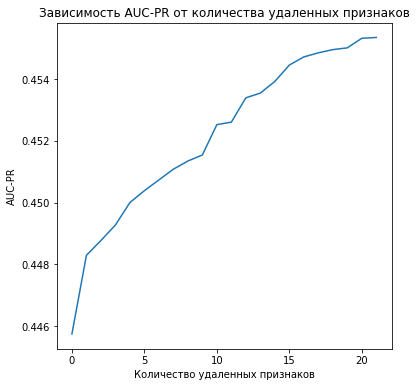

In [414]:
plt.figure(figsize=(6,6))
plt.plot(history)
plt.title('Зависимость AUC-PR от количества удаленных признаков')
plt.xlabel('Количество удаленных признаков')
plt.ylabel('AUC-PR')

In [399]:
X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)
best_features_train = X_train_encoded[:, features_idx]
best_features_test = X_test_encoded[:, features_idx]

In [400]:
logreg = Pipeline([
    ('logreg', LogisticRegression(penalty='l2', max_iter=500))
])
C_param_name = 'logreg__C'
C_values = np.logspace(-2, 2, 5)
search = GridSearchCV(logreg, {C_param_name: C_values}, cv=5)
model = search.fit(best_features_train, y_train)

In [401]:
print('Лучшее значение регуляризатора: ' + str(search.best_params_[C_param_name]))
best_model = search.best_estimator_
prediction_train = best_model.decision_function(best_features_train)
print("AUC-PR (train) = " + str(round(average_precision_score(y_train, prediction_train), 5)))
prediction_test = best_model.decision_function(best_features_test)
print("AUC-PR (test) = " + str(round(average_precision_score(y_test, prediction_test), 5)))

Лучшее значение регуляризатора: 10.0
AUC-PR (train) = 0.45528
AUC-PR (test) = 0.44496


Как видно, данная вариация жадного алгоритма с элементами брут-форса дает определенные результаты. Но, к сожалению, метод выполняется **очень долго** (очевидно, обучить надо порядка 1000 моделей) 

Стоит отметить, что с помощью такого метода можно пойти и в обратную сторону. Попробуйте _добавлять_ по одному самому полезному признаку в выборку до тех пор, пока не наберется 40 штук. Найдется ли порог, при котором добавление следующих признаков будет только ухудшать качество модели?

In [415]:
def get_best_features_brute_reverse(classificator, X, y):
    included_idx = []
    history = []
    n = 40
    features = [i for i in range(X.shape[1])]
    features_used = []
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4, stratify=y)
        max_auc = 0
        max_auc_idx = -1
        features_used = [feature for feature in features if feature in included_idx]
        for column in range(X_train.shape[1]):
            if (column in features_used):
                continue
            features_used.append(column)
            X_train_curr = X_train[:, features_used]
            X_test_curr = X_test[:, features_used]
            classificator.fit(X_train_curr, y_train)
            prediction = classificator.decision_function(X_test_curr)
            auc = average_precision_score(y_test, prediction)
            if auc > max_auc:
                max_auc = auc
                max_auc_idx = column
            features_used.remove(column)
        print("[" +str(i+1)+ ']'+"Добавляем признак с индексом=" + str(max_auc_idx) + ", после добавления которого AUC-PR=" + str(max_auc))
        included_idx.append(max_auc_idx)
        history.append(max_auc)
    features_used = [feature for feature in features if feature in included_idx]
    return features_used, history

In [416]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])
X_train_encoded = column_transformer.fit_transform(X_train)
logreg = Pipeline([
    ('logreg', LogisticRegression(penalty='l2', max_iter=500))
])
features_idx, history = get_best_features_brute_reverse(logreg, X_train_encoded, y_train)

[1]Добавляем признак с индексом=60, после добавления которого AUC-PR=0.3383400585196503
[2]Добавляем признак с индексом=37, после добавления которого AUC-PR=0.3943538926439805
[3]Добавляем признак с индексом=49, после добавления которого AUC-PR=0.40959997545688
[4]Добавляем признак с индексом=39, после добавления которого AUC-PR=0.4237533785703637
[5]Добавляем признак с индексом=61, после добавления которого AUC-PR=0.43248228792105314
[6]Добавляем признак с индексом=33, после добавления которого AUC-PR=0.4378178044972311
[7]Добавляем признак с индексом=36, после добавления которого AUC-PR=0.4428109277934652
[8]Добавляем признак с индексом=59, после добавления которого AUC-PR=0.44513131130980055
[9]Добавляем признак с индексом=13, после добавления которого AUC-PR=0.44718976947152395
[10]Добавляем признак с индексом=58, после добавления которого AUC-PR=0.4481367664789313
[11]Добавляем признак с индексом=1, после добавления которого AUC-PR=0.4495931511330609
[12]Добавляем признак с индекс

Text(0, 0.5, 'AUC-PR')

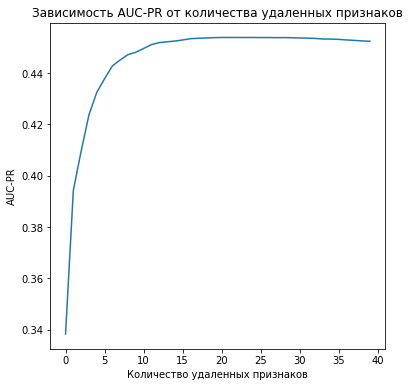

In [417]:
plt.figure(figsize=(6,6))
plt.plot(history)
plt.title('Зависимость AUC-PR от количества удаленных признаков')
plt.xlabel('Количество удаленных признаков')
plt.ylabel('AUC-PR')

Как видно по логам и графику, порог, после которого происходило только ухудшение модели, было на добалении 21 признака 

In [418]:
X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)
best_features_train = X_train_encoded[:, features_idx]
best_features_test = X_test_encoded[:, features_idx]

logreg = Pipeline([
    ('logreg', LogisticRegression(penalty='l2', max_iter=500))
])
C_param_name = 'logreg__C'
C_values = np.logspace(-2, 2, 5)
search = GridSearchCV(logreg, {C_param_name: C_values}, cv=5)
model = search.fit(best_features_train, y_train)

print('Лучшее значение регуляризатора: ' + str(search.best_params_[C_param_name]))
best_model = search.best_estimator_
prediction_train = best_model.decision_function(best_features_train)
print("AUC-PR (train) = " + str(round(average_precision_score(y_train, prediction_train), 5)))
prediction_test = best_model.decision_function(best_features_test)
print("AUC-PR (test) = " + str(round(average_precision_score(y_test, prediction_test), 5)))

Лучшее значение регуляризатора: 0.1
AUC-PR (train) = 0.44746
AUC-PR (test) = 0.44063


Данный метод показал себя немного хуже предыдущего. Вероятно, если бы мы остановились на 21 признаке, было бы лучше :)

Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ:**
Встроенный метод:

    - Преимущества: компромиссный вариант между скоростью и качеством отбора
    - Недостатки: требуется предварительно обученнная модель, необходима предобработка признаков

Фильтрация:

    - Преимущества: признаки отбираются очень быстро, нужен всего один проход по датасету
    - Недостатки: легко переобучается

Метод обёртки:

    - Преимущества: довольно точный метод с возможностью тонкой настройки процесса отбора (критерии остановы)
    - Недостатки: ДОЛГО

# Часть 3. Оценка экономического эффекта модели

В данной части мы займемся тем, что от вас скорее всего потребуется на реальной работе (помимо перекладки `json`, разумеется). А именно: мы соберем несколько специализированных метрик качества, попытаемся настроить модель на максимизацию _прибыли_ и оценим, сколько вообще получится заработать на этом. Разумеется, здесь будет сделано множество упрощающих жизнь допущений, но обо всем по порядку. 

__Задание 11 (1 балл).__ Допустим, работники вашего колл-центра получают за один звонок клиенту 1 доллар. При согласии клиента на предлагаемые условия он принесет в банк 10 долларов.

Если вы всё прослушали на экономике, то напомним, что выручка — это сколько денег нам принесли клиенты, а прибыль — выручка за вычетом расходов на зарплату и прочее.

Загрузите данные о телемаркетинге из предыдущего блока заданий. В этой части не нужно делить выборку - мы будем использовать кросс-валидацию. Используйте 5 фолдов, сделайте `shuffle=True, random_state=500`. По кросс-валидации у вас получится 5 вариантов обучающей и тестовой выборки. Обучите логистическую регрессию на каждой обучающей выборке (воспользуйтесь one-hot для категориальных признаков, гиперпараметры оставьте со значениями по умолчанию) и сделайте предсказания для соответствующих тестовых выборок. Допустим, всем положительным прогнозам ваши сотрудники решили позвонить. Посчитайте на всех тестовых выборках выручку и усредните. Сколько денег вы в среднем заработаете? Также вычислите стандартное отклонение.

Сколько из заработанных денег придётся отдать операторам вашего колл-центра?

In [17]:
from sklearn.model_selection import KFold
folds = KFold(n_splits=5, shuffle=True, random_state=500)
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])
logreg = Pipeline([
    ('transform', column_transformer),
    ('logreg', LogisticRegression(penalty='l2', max_iter=500))
])

In [440]:
income_call = 10
price_call = 1
incomes = []
calls = []
for train_idx, test_idx in folds.split(X):
    model = logreg.fit(X.loc[train_idx], y[train_idx])
    prediction = logreg.predict(X.loc[test_idx])
    y_test = y[test_idx]
    true_positives = np.where((prediction == 1) & (y_test == 1), 1, 0)
    incomes.append(true_positives[true_positives == 1].shape[0] * income_call)
    calls.append(prediction[prediction==1].shape[0])
print(incomes)
print(calls)

[2240, 2110, 2090, 2250, 1970]
[310, 330, 330, 330, 322]


In [447]:
print('Средняя выручка: ' + str(np.mean(incomes)) + '$')
print('Стандартное отклонение: ' + str(np.std(incomes)))

Средняя выручка: 2132.0$
Стандартное отклонение: 104.0


In [449]:
print('В среднем отдать звонящим: ' + str(np.mean(calls) * price_call) + '$')

В среднем отдать звонящим: 324.4$


Внесем некоторую долю случайности. Пусть теперь согласный на условия клиент будет приносить не 10 долларов, а случайную величину, равномерно распределенную в интервале $[0;20)$. Проделайте все те же самые действия. Для имитации реальной ситуации **НЕ** фиксируйте `random_seed` при подсчете выручки с клиента. Что получилось?

In [458]:
#your code here
y_with_income = pd.DataFrame(columns=['prediction', 'income'])
y_with_income.loc[:, 'prediction'] = y
y_with_income.loc[:, 'income'] = np.random.uniform(0, 20, y.shape[0])

In [466]:
income_call_min = 0
price_call = 1
income_call_max = 20
incomes = []
calls = []
for train_idx, test_idx in folds.split(X):
    model = logreg.fit(X.loc[train_idx], y[train_idx])
    prediction = logreg.predict(X.loc[test_idx])
    y_test = y[test_idx]
    true_positives = np.where((prediction == 1) & (y_test == 1), 1, 0)
    incomes.append(true_positives[true_positives == 1].shape[0] * np.random.uniform(income_call_min, income_call_max))
    calls.append(prediction[prediction==1].shape[0])
print(incomes)
print(calls)

[2616.911972081381, 1079.5242749211625, 982.4924639696296, 3856.3363754050724, 1086.074200704128]
[310, 330, 330, 330, 322]


In [467]:
print('Средняя выручка: ' + str(round(np.mean(incomes), 2)) + '$')
print('Стандартное отклонение: ' + str(round(np.std(incomes), 2)))
print('В среднем отдать звонящим: ' + str(np.mean(calls) * price_call) + '$')

Средняя выручка: 1924.27$
Стандартное отклонение: 1141.56
В среднем отдать звонящим: 324.4$


Полученная средняя выручка близка к полученной на прошлом этапе, поскольку фиксированная прибыль 10 долларов - середина интервала для второго варианта расчета прибыли. Очевидно, стандартное отклонение вырасло очень значительно, опять же из за распределения.

Настройте по кросс-валидации коэффициент регуляризации модели для максимизации прибыли (считайте как случайную величину выше). Удалось ли получить какой-то выигрыш? При каком коэффициенте регуляризациии прибыль максимальна? Постройте график зависимости ожидаемой прибыли от коэффициента, также укажите стандартные отклонения (вам поможет `plt.errorbar`).

In [482]:
#your code here
def get_profits(C_values):
    income_call_min = 0
    price_call = 1
    income_call_max = 20
    profits_by_C = {}
    for C_value in C_values:
        profits = []
        for train_idx, test_idx in folds.split(X):
            model = logreg.fit(X.loc[train_idx], y[train_idx])
            prediction = logreg.predict(X.loc[test_idx])
            y_test = y[test_idx]
            true_positives = np.where((prediction == 1) & (y_test == 1), 1, 0)
            profit = true_positives[true_positives == 1].shape[0] * np.random.uniform(income_call_min, income_call_max) - prediction[prediction==1].shape[0] * price_call
            profits.append(profit)
        profits_by_C[C_value] = profits
    profit_means_by_C = []
    profit_devs_by_C = []
    for C, profits in profits_by_C.items():
        profit_means_by_C.append(np.mean(profits))
        profit_devs_by_C.append(np.std(profits)) 
    return profit_means_by_C, profit_devs_by_C

In [483]:
C_values = np.logspace(2, -2, 10)
means, devs = get_profits(C_values)

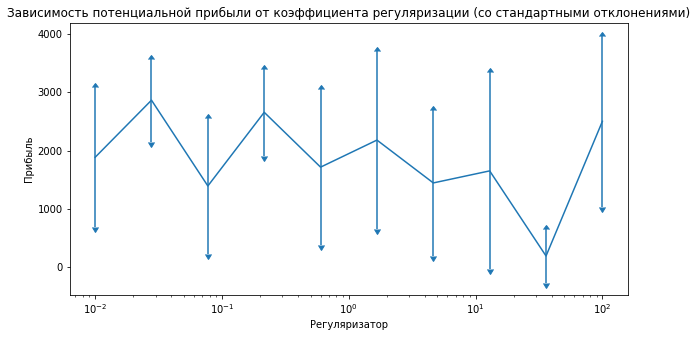

Лучшее значение регуляризатора С=0.02782559402207126
Прибыль для данного значения регуляризатора: 2864.38$


In [487]:
plt.figure(figsize=(10,5))
plt.errorbar(C_values, means, devs, uplims=True, lolims=True)
plt.xscale('log') # для адекватной демонстрации, поскольку отличия в коэффицентах C - порядковое
plt.title('Зависимость потенциальной прибыли от коэффициента регуляризации (со стандартными отклонениями)')
plt.xlabel('Регуляризатор')
plt.ylabel('Прибыль')
plt.show()
print("Лучшее значение регуляризатора С=" + str(C_values[means.index(max(means))]))
print("Прибыль для данного значения регуляризатора: " + str(round(max(means), 2)) + '$')

Попробуйте запустить перебор несколько раз. Находится ли каждый раз один и тот же "лучший" коэффициент? Присутствует ли какая-то закономерность? Какие вы можете сделать из этого выводы?

In [489]:
#your code here
for i in range(5):
    print("Попытка " + str(i+1))
    means, devs = get_profits(C_values)
    print("Лучшее значение регуляризатора С=" + str(C_values[means.index(max(means))]))
    print("Прибыль для данного значения регуляризатора: " + str(round(max(means), 2)) + '$')
    print()

Попытка 1
Лучшее значение регуляризатора С=0.02782559402207126
Прибыль для данного значения регуляризатора: 2444.97$

Попытка 2
Лучшее значение регуляризатора С=100.0
Прибыль для данного значения регуляризатора: 2818.14$

Попытка 3
Лучшее значение регуляризатора С=0.21544346900318845
Прибыль для данного значения регуляризатора: 2803.02$

Попытка 4
Лучшее значение регуляризатора С=35.938136638046274
Прибыль для данного значения регуляризатора: 2490.69$

Попытка 5
Лучшее значение регуляризатора С=0.02782559402207126
Прибыль для данного значения регуляризатора: 2769.64$



В силу того, что прибыль со звонка генерируется случайным образом с большой вариативностью, однозначных выводом сделать не получится. Тем не менее, наблюдается закономерность, что небольшой регуляризатор порядка сотых долей показывает себя лучше всего.

__Задание 12 (1 балл).__ Выше мы уже описали примерную экономическую модель вашей задачи. Как вы считаете, что для вашего бизнеса важнее — хороший precision или recall модели? Почему?

__Ответ:__ нам больше важен recall. Цена звонка (а значит, цена FP результата) незначительно, зато покрытие как можно большего числа объектов положительного класса будет очень хороша для нашей модели, ведь мы получаем относительно много выручки за одобренную заявку. 



Вспомним, что на самом деле логистическая регрессия предсказывает нам вероятности положительного класса для объекта. Возможно, путем настройки порога бинаризации этих вероятностей мы сможем получить какой-то выигрыш? Проверьте ваши рассуждения выше с помощью настройки порога бинаризации на кросс-валидации для максимизации прибыли. Воспользуйтесь сеткой от 0 до 1 с шагом 0.01. Напомним, что снижение порога дает нам более высокий recall и более низкий precision, и наоборот.

In [534]:
#your code here
def get_profits_thresholds(thresholds):
    income_call_min = 0
    price_call = 1
    income_call_max = 20
    folds = KFold(n_splits=5, shuffle=True, random_state=500)
    profits_total = []
    for train_idx, test_idx in folds.split(X):
        model = logreg.fit(X.loc[train_idx], y[train_idx])
        probas = logreg.predict_proba(X.loc[test_idx])[:, 1]
        profits = []
        for threshold in thresholds:
            prediction = (probas > threshold)
            y_test = y[test_idx]
            true_positives = np.where((prediction == 1) & (y_test == 1), 1, 0)
            profit = true_positives[true_positives == 1].shape[0] * np.random.uniform(income_call_min, income_call_max) - prediction[prediction==1].shape[0] * price_call
            profits.append(profit)
        profits_total.append(profits)
    means = []
    devs = []
    for threshold in range(len(thresholds)):
        results_for_thresh = []
        for cv_result in range(len(profits_total)):
            results_for_thresh.append(profits_total[cv_result][threshold])
        means.append(np.mean(results_for_thresh))
        devs.append(np.std(results_for_thresh))
    return means, devs

In [535]:
thresholds = np.arange(0, 1, 0.01)
means, devs = get_profits_thresholds(thresholds)

Постройте график зависимости прибыли от порога бинаризации, также отметьте на нем стандартные отклонения. Выделите наилучший порог. 

Лучшее значение порога=0.13
Прибыль для данного значения порога: 6859.4$


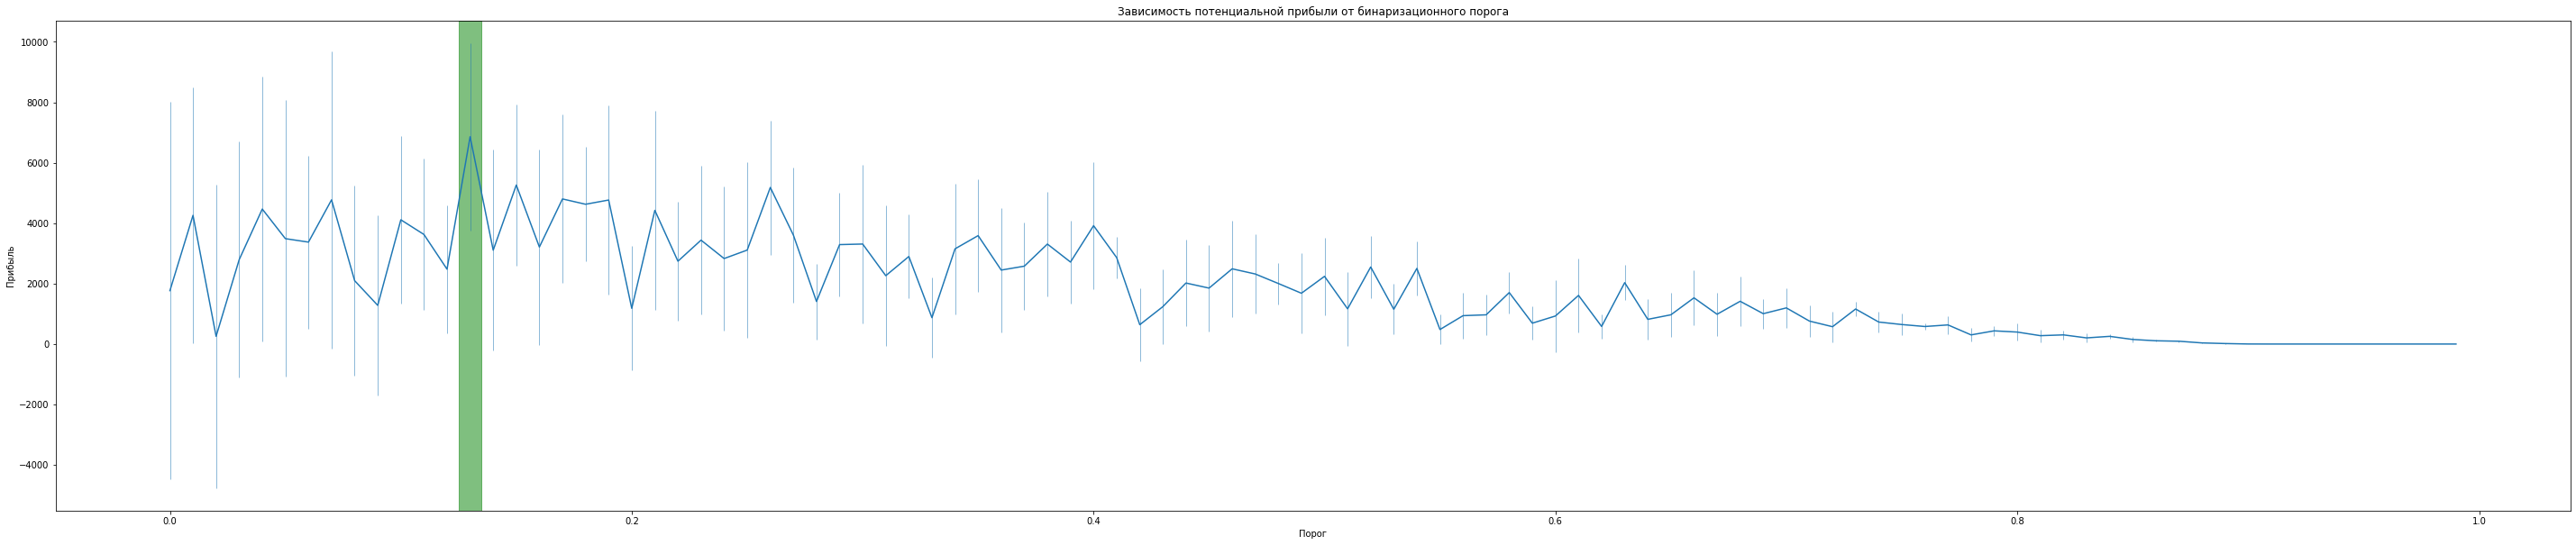

In [536]:
#your code here
best_threshold = thresholds[means.index(max(means))]
print("Лучшее значение порога=" + str(best_threshold))
print("Прибыль для данного значения порога: " + str(round(max(means), 2)) + '$')
plt.figure(figsize=(50,10))
plt.axvspan(best_threshold-0.005, best_threshold+0.005, color='green', alpha=0.5)
plt.errorbar(thresholds, means, devs, elinewidth=0.5)
plt.title('Зависимость потенциальной прибыли от бинаризационного порога')
plt.xlabel('Порог')
plt.ylabel('Прибыль')
plt.show()

__Вопрос:__ Замечаете ли вы какую-то закономерность? Для правильного ответа на этот вопрос попробуйте запустить несколько раз и задумайтесь, почему порог получается в какой-то конкретной области?

In [538]:
for i in range(5):
    print('Попытка ' + str(i + 1))
    means, devs = get_profits_thresholds(thresholds)
    best_threshold = thresholds[means.index(max(means))]
    print("Лучшее значение порога=" + str(best_threshold))
    print("Прибыль для данного значения порога: " + str(round(max(means), 2)) + '$')
    print()

Попытка 1
Лучшее значение порога=0.07
Прибыль для данного значения порога: 8430.31$

Попытка 2
Лучшее значение порога=0.15
Прибыль для данного значения порога: 7191.63$

Попытка 3
Лучшее значение порога=0.1
Прибыль для данного значения порога: 7487.24$

Попытка 4
Лучшее значение порога=0.12
Прибыль для данного значения порога: 6773.36$

Попытка 5
Лучшее значение порога=0.2
Прибыль для данного значения порога: 6324.8$



Значения порога всегда довольно небольшие, и это очевидно вытекается из описанного выше факта - цена FP результата невелика, поэтому лучше всего занижать порог, чтобы объять больше объектов положительного класса

Каковы значения precision и recall на выбранном пороге? Оцените по кросс-валидации. Также вычислите стандартное отклонение.

In [542]:
from sklearn.metrics import recall_score, precision_score

threshold = 0.07
recalls = []
precisions = []
for train_idx, test_idx in folds.split(X):
    model = logreg.fit(X.loc[train_idx], y[train_idx])
    probas = logreg.predict_proba(X.loc[test_idx])[:, 1]
    prediction = probas > threshold
    recalls.append(recall_score(y[test_idx], prediction))
    precisions.append(precision_score(y[test_idx], prediction))

In [548]:
print('Для порога=' + str(threshold))
print('precision=' + str(round(np.mean(precisions), 4)) + ' с отклонением=' + str(round(np.std(precisions), 4)))
print('recall=' + str(round(np.mean(recalls), 4)) + ' с отклонением=' + str(round(np.std(recalls), 4)))

Для порога=0.07
precision=0.2307 с отклонением=0.0087
recall=0.7423 с отклонением=0.0119


Как вы, вероятно, уже поняли, ваша модель склоняется к более высокому recall. Попробуйте оценить качество модели с помощью `PR-AUC` в зоне recall $\geq$ 0.5. Сделайте это следующим образом - выберите только те пороги, на которых достигается необходимый recall, затем интерпретируйте отсеченный в единичном квадрате прямоугольник как новый единичный квадрат и посчитайте площадь под отсеченной кривой. 

In [18]:
#your code here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = logreg.fit(X_train, y_train)
prediction = logreg.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, prediction)

In [34]:
precision_half = []
recall_half = []
thresholds_half = []
for i in range(len(thresholds)):
    if (recall[i] > 0.5):
        precision_half.append(precision[i])
        recall_half.append(recall[i])
        thresholds_half.append(thresholds[i])
print('AUC-PR (recall > 0.5) = ' + str(auc(recall_half, precision_half)))

AUC-PR (recall > 0.5) = 0.12598051691059933


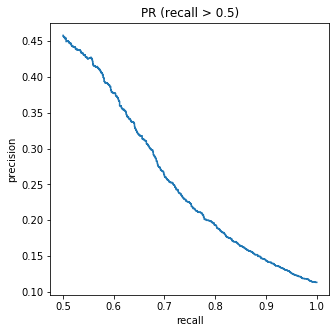

In [35]:
plt.figure(figsize=(5,5))
plt.plot(recall_half, precision_half)
plt.title('PR (recall > 0.5)')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

__Бонус (0.01 балла):__ что вы кушали в день сдачи данного ДЗ на завтрак?

__Ответ:__ [Перетёртые либо размятые плоды с изделием из мясного фарша](https://youtu.be/A1Qb4zfurA8)